# Working with linear regressions in Python

In earlier experiments, we've plotted some data and got the equation of a line.  However, we'd like to be able to do some more sophisticated data analysis when working with linear regressions.  Today we're going to work with some sample data and take a look at how to think seriously about error in a real experiment!

Let's say we have sample data collected for the following known concentrations of glucose:
	Blank,	5.0 mM,	10.0 mM,	15.0 mM,	20.0 mM,	25.0 mM

Here are the GOX + glucose reaction rates recorded at room temperature by 3 different students:

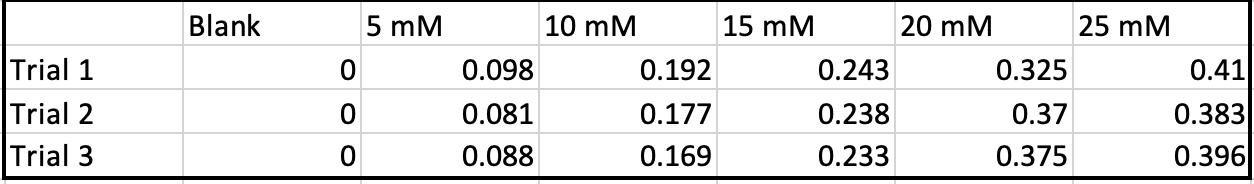

They also measured an unknown solution which produced the following absorbance values:

* 0.306
* 0.308
* 0.314
* blank = 0.000
        
      
Think about what you need to do to turn this data into a useful calibration curve to determine the concentration of the unknown. In words, write out a plan for everything you need to do here (note, how are you going to handle the fact that we have multiple measurements for each standard solution?)









After you have brainstormed a plan, move on to the code:

In [ ]:
# we will often import a number of extra packages into python. These are just a the ones we need today:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


# The first thing you're likely to need is to turn all of those replicate values into averages, and compile those 
# averages into a single array.  In preparation, download the file  from Blackboard and placed
# in your Chem 220 folder into a numpy array called "data".
data = np.genfromtxt('drylabdata.csv', dtype=float, delimiter=',', names=None) 

print(data)

# Note the format here; each row is a trial, each column is a different data set. 

In [ ]:
# Think about what you learned about how arrays work in Python. We can use column and row numbers to call the data we need
# But remember, Python starts counting at zero!

# here i'm slicing out just the first column of numbers, which were measured for the blank sample.
blank = data[:,0]

# note that we can also do math on a subset of the array using numpy this way:
blank_mean = np.mean(data[:,0])

print (blank)
print (blank_mean)


# here I'll call just the first row of numbers

trial_1 = data[0,:]

print(trial_1)


# add your own code to distribute the data into individual arrays, corresponding to the various standards

#std_1 =
#std_2 = 
#std_3 = 
#std_4 = 
#std_5 = 

# print them out to check your work!  

print ("the three trials collected for the 5.0 mM standard averaged " + str(std_1))

## Plotting a standard curve when replicate data was collected

Hopefully you realized that you probably need to take the average of the three trials here before you combine all of your data!

This is something you've done before, but to avoid having to type everything out six times to cover all of our trials, we're going to automate this process with a while loop!

Note that you've seen while loops before, but it may not have been clear how they worked. Note we need a counter, to keep track of how many times we've repeated the loop, and we're going to make an empty array to put our average absorbance values into.

We might also want to have some idea about the precision of those values. Run this code once without any changes and think about how it's working! Then, add new code inside the while loop to produce fill in a second array (called "stdev") with the standard deviations for each standard.

In [ ]:
count = 0
rate = []
stdev = []

while (count < 6):
    # here we calculate the average of each column. Note, our counter variable gets to do double duty here!
    
    rate_temp = np.mean(data[:,count])
    rate.append (rate_temp)
    # Add code to calculate the standard deviation of each column.  Use np.std for this.

    
    count = count + 1
    
    
# here i've just converted standard deviation into a numpy array to make our lives easier later
# the append command as we use it here only works on regular lists, not numpy arrays, which is something to be aware of.

# but numpy arrays are way easier to do simple math with; say to 'correct' all of our absorbance values 
# by subtracting the blank!
rate = np.array(rate) -  blank_mean
stdev = np.array(stdev)  


# take a look at your reported values.  Add a print statement for the standard deviations.
print(rate)


## Plotting a standard curve when replicate data was collected

Now that you have the average data for your trials. Let's create a plot from the data

In [ ]:
# We also need the concentration values which correspond to our data, to use as our x-axis values.
# We can record them directly from the data
# Insert them here:
concentration = np.array([])


# put together a graph using the plot command
# in 'plot', first comes the x axis, then the y, then 'ro' plots our points as red circles. 



plt.plot(concentration, rate, 'ro')

# Add labels on the x and y axis, always including units.
plt.xlabel("x axis label (units)")
plt.ylabel("y axis labels (are there units here too?)")



Now you should see a figure above with red dots making the data points, along with some very unhelpful axis labels. 

1. Update the axis labels to something that is actually properly descriptive for your data

2. Hit RUN again to rerun this code now that you have updated it.

You should now have a plot of your data, with useful axis labels letting you know that absorbance is on the y axis, and concentration is on the x axis. Hopefully, your data looks fairly linear! 

The next thing you need to do is to export that plot so you can put it in your lab notebook! You have a few choices; you can take a screenshot and paste the image into Lab Archives, or you use Python's built in export too. Copy the following line of code into the block above, and re-run the block

plt.savefig("conc_vs_abs_fig.png")


A png-format figure called "conc_vs_abs_fig" should now be in the same folder you saved this Jupyter notebook in! You can upload it to your lab notebook as an attachment, as usual. Be careful to change the file name anytime you use this command, or your old file will be overwritten by the new file!

## Adding error bars to our plot

We might consider using the standard deviation as a way to communicate some uncertainty in each of these values. We can do that by adding error bars to the plot!

Standard deviation is a very blunt instrument for expressing error in this case, but it is better than nothing. Let's try that first.

In [ ]:
plt.errorbar(concentration, rate, yerr = stdev, xerr = None, fmt = 'r.')
plt.xlabel("concentration (mM)")
plt.ylabel("Reaction Rate (Abs/min)")

#plt.savefig("std_errorbars.png")

 It is best to use the confidence interval for error bars instead! Remember, we just need to multiply our standard deviation by a Student's t constant, and divide by the square root of n. Here, let's show error bars at the 95 % confidence interval.
 
 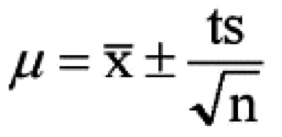

In [ ]:

# use c to set the confidence you want (90 % is 0.90, for example)
c =
# have you seen any command that might give you n without just inputting a number? 
# ...to make your code more general for different data sets?
n =

t = stats.t.ppf(c, n-1)
CI_95 = stdev*(t/math.sqrt(n))

plt.errorbar(concentration, rate, yerr = CI_95, xerr = None, fmt = 'r.')
plt.xlabel("concentration (mM)")
plt.ylabel("Reaction Rate (Abs/min)")

#plt.savefig("CI95_errorbars.png")

## External Calibration Curve
This type of plot is called an <b> external calibration curve </b> in analytical chemistry, because we can take some other (external) data point, for which we have, say, an exzyme rate measurement, and use this plot to determine that unknown sample's glucose concentration. You have done this before in A-chem and in general chemistry (for example, you have plotted absorbance vs. Ni concentration in 152L).


To get the most out of an external calibration curve, it's helpful to have the equation of the line, in <i> y = mx + b </i> format. That allows you to quickly and easily do the math to determine any <i> x </i> (here, concentration in mole/liter) for any measured <i> y </i> (here, reaction rate). You may know how to do this in Excel, or on your graphing calculator. Let's take a look at how it works in Python!

In [ ]:
# The linear regression function in the scipy stats module returns 5 values: slope, intercept, 
#   R (the correlation coefficient, which is usually reported after squaring it to get R2) and 
#   then two other uncertainty values p and u_m
# We'll ignore the last two for the moment, since all we really need right now is the equation of the line
m, b, R, p, u_m = stats.linregress(concentration, rate)

# Write some code to calculate R_squared:


print ('the equation of the line is y = ' + str(m) + 'x + ' + str(b) + ' and its R value is '+ str(R_squared))




## Adding the 'best fit line' to your graph

It's always a nice reality check to see the line plotted along with your data. In this case, we can think about this line as a model to help us make a prediction about our data. So we can plug in a range of concentration values, and we so we can plot the y values that our y = mx + b model predicts, and see how well it matches the real data.

In [ ]:
# Use our predicted model
predict_y = (concentration*m)+b
# Plot the predicted data (note if we don't ask for a specific marker style, we'll just get a line)
plt.plot(concentration,predict_y)

#add the real data to the plot, just like we did before:
plt.errorbar(concentration, rate, yerr = CI_95, xerr = None, fmt = 'r.')
plt.xlabel("concentration (mM)")
plt.ylabel("Reaction Rate (Abs/min)")



## Solve for your unknown

Using the equation above, calculate your unknown concentration by hand first. Then complete the code below to calculate the unknown concentration. Make sure your hand-written calculation and your python code are producing the same result!

In [ ]:
#Add the absorbance measurements of the unknown to the array called "unknown" here:

unknown = np.array([])

unknown_av = np.mean(unknown)

unknown_std = np.std(unknown)

# now using m, b and unknown_density, solve for unknown_concentration
unknown_concentration = (unknown_av-b)/m

print ('the concentration of the unknown is ' + str(unknown_concentration) + ' mM')

# Did you get a number near 19 mM?  If not, check your data entry and math!

## Uncertainty in a linear regression

We have an $R^{2}$ value which gives us an idea how well our predicted line is able to fit our real data, but it's hard to turn that value into a real uncertainty value on our unknown calcultion. Ideally, we'd like an uncertainty in the same units are our final answer here (so in this case, in mM). In order to do that, we need to think about what error actually means in a linear regression.

You read a lot of detail about how the matrix math works to produce that linear regression, and along with it, error values in the slope and intercept values produced. For whatever reason, most of the python linear regression packages just return the uncertainty in the slope ($u_{m}$ in our textbook, $s_{m}$ in the output of the scipy stats linregress function). This is useful if you're main goal is to use a linear regression to determine a relationship between your variables, but in our case, we really need the error in the y values being predicted (the standard error of the regression, or $s_{y}$). That is the value we can transform into an x value error ($s_{x}$) -- what we ultimately want if we are using the regression line as a calibration curve!

Think about what error on the y-value means. You're making a prediction, so our questions is how close is that prediction to the real value?

First, we'll think about the deviation of each measured y value ($y_{i}$) from the predicted y value (where $ y= mx+b $):

$$ d_{i} = y_{i} - (m x_{i} + b) $$

Then we want to compile those deviations for every point we have available, to turn them into an overall assessment of the standard deviation of the y values, divided by the degrees of freedom in the fit:

$$ s_{y}={\sqrt {\frac {\sum (d_{i})^{2}}{n-2}}} $$

In [ ]:
# Manually calculate error in y.  Sadly, standard error in most python packages is the error in the slope, 
# rather than error in the y-predictions of the model.  So, let's walk through this:

count = 0
sum_square = 0

n = len(rate)

## so here, for every single point in our array, we're plugging in concentration, and comparing it to the actual measured absorbance
# Again, note that our count variable does double duty; keeping track of the while loop, and calling the right array value! 

while count < n:
    sum_square = sum_square + ((rate[count]-(m*concentration[count])-b)**2)
    count = count + 1
    
y_err = math.sqrt(sum_square/(n-2))
print ("the y error predicted by this linear regression model is " + str(round(y_err,5)) + " arbirtrary absorbance units")



Is your output correct?  The quickest way to check of your output is at least reasonable is to look at the previous graph.  If your output is correct, you should see some data points that are above or below the linear fit by the approximately amount you have just calculated.


### Standard uncertainty in the intercept

Since the linear regression command in the stats module gives us the uncertainty in the slope $u_{m}$, and we just calculated the uncertainty in the y values $s_{y}$, we can take a shortcut to the uncertainty in the intercept, which avoids having to actually do any matrix math here. Note that

$$ u_{m}^{2} = \frac{s_{y}^{2}n}{D}      $$
D is defined in our textbook (in 4-7) as
$$ D = \frac{n\sum{x_{i}^{2}}}{\sum{x_{i}}\sum{x_{i}}} $$

However, the equation for $u_{m}^{2}$ can be rearranged to an alternative and much more useful definition for D: $$ D = \frac{s_{y}^{2}n}{u_{m}^{2}} $$

Now we can take the definiation of $ u_{b}^{2} $ and convert it to a combination of values we have already calculated!
$$ u_{b}^{2} = \frac{s_{y}^{2}\sum{x_{i}^{2}}}{D} = \frac{\sum{x_{i}^{2}}u_{m}^{2}}{n} $$

Once you have all of these uncertainty values, be sure to write the equation of the line, with full uncertainty, in your lab notebook when you report your final results!


In [ ]:
u_b = math.sqrt((sum(concentration**2)*(u_m**2))/(len(concentration)))

print("The uncertainty in the slope is " + str(u_m))
print("The uncertainty in the intercept is " + str(u_b))



### Convert a y value into an uncertainty on our calculated x value

Now we have all of the information we need to propogate error through the calibration curve. We can use equation 4-27 in your textbook:

$$ s_{x}= \frac{s_{y}}{\mid{m}\mid}{\sqrt {\frac {1}{k} + \frac {1}{n} + \frac {(y-\bar{y})^{2}}{m^{2}\sum (x_{i}-\bar{x})^{2}}}} $$

You now have all of these variables:  m is the slope, k is the number of replicate measurements of your unknown, n is the number of points in your calibration curve including the blank run, and x is all of your calibration curve x values, either individually ($ x_{i} $) or the average of those values $ (\bar{x} ) $ 

$\bar{y}$ is the average of all of the y values in your calibration curve, and y is the (average) reaction rate of the unknown you measured -- in other words, the number you plugged into the calibration curve to solve for concentration. Note that this means that the closer your measured unknown is to the center of your calibration curve, the smaller the error in the result will be.  Mathematically, this is the term that causes the 95% confidence interval to get narrower at the center of the regression and wider at the edges!

Now we have to set up some math to make this happen. I'd strongly suggest breaking it down into components!

In [ ]:
# first, calculate s_y/m

var1 = y_err/m

# then, let's get all of the pieces inside the square root

# here we're using the length command to just check how long our unknown array was, and how long our calibration curve x value array was
inv_k = 1/len(unknown)
inv_n = 1/len(concentration)

# now let's get the two averages
y_bar = np.mean(rate)
x_bar = np.mean(concentration)

# We'll need a loop to handle the sum
# i will be our counter variable here, so initially set it to zero
i = 0
# ss is where we'll save the sum of squares

ss = 0

# Can you complete the while loop to compute the sum of squares of (xi - xbar)? 
while i < #complete the decision statement here, ending with a colon  :
    ss = # complete the expression. Think about how you will call individual x values
    i = i+1


# now calculate the 3rd term under the square root

var4 = ((unknown_av-y_bar)**2)/((m**2)*ss)



s_x =  var1*math.sqrt(inv_k+inv_n+var4)

# always report uncertainy values with their accompanying measured values
print ('the concentration of the unknown is ' + str(unknown_concentration) + ' mM +/- ' + str(s_x) + 'mM')

#report a relative error instead of absolute

s_x_rel = (s_x/unknown_concentration) * 100

print ('the concentration of the unknown is ' + str(unknown_concentration) + ' mM with a ' + str(s_x_rel) + '% relative error.')

If everything has gone right working with the test dataset, you should end up with a relative error between 4 and 5% for the unknown concentration.  Record the exact relative error in your ELN.  

Now that you have a working Python calculation that can analyze the error that comes from using a linear calibration curve, use this code to read in your real Lab 4 calibration data.  Note that for every unknown that you measure, y is different, so the $s_{x}$ error in the result will also be slightly differnt.  You will therefore need to run the code to determine the error in the glucose concentration for each of your diluted soda samples.

The ultimate goal here is to determine the error in glucose concentrations of the undiluted soda samples.  To get from diluted to undiluted, you used $C_{1}V_{1} = C_{2}V_{2}$.  In other words, the undiluted soda sample glucose concentration was calculated from the diluted concentration, a 1 mL volume measurement, and a 25 mL volume measurement.  Look up the measurement error in each of these two volume measurements, then <b>write some code to properly combine errors from the 3 sources</b>, given that we are <b>multiplying and dividing</b> the volumes to get our final concentrations.  

It is likely that the relative error in your final concentration is very close to what it was in the diluted concentration.  Check that this is true, and explain why this is true in the ELN.


## Submission Instructions
In your lab notebook, upload each of the graphs you made in this code, and explain the difference in each one. Then, report the equation of the linear regression line, and your calculated glucose concentration in the undiluted soda sample, with the correct uncertainty and the correct # of significant digits in each. Explain the difference between s_y and s_x as error values. Save this notebook with your name in the title and attach it to the lab archives page! 